# California Housing with Regularization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

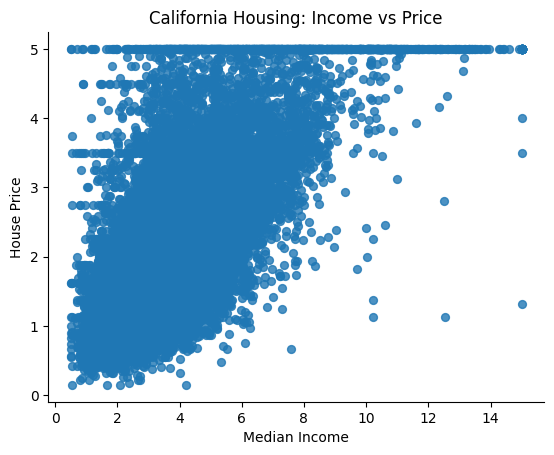

In [ ]:
# Load the California Housing dataset
housing = fetch_california_housing()
data = pd.DataFrame(housing.data, columns=housing.feature_names)
data['Price'] = housing.target

# Plot the data
data.plot(kind='scatter', x='MedInc', y='Price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.title('California Housing: Income vs Price')
plt.show()

In [ ]:
# Prepare data for regression
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'MLP': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
    'SVM': SVR(kernel='rbf', C=1.0, epsilon=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MSE': mse,
        'R2': r2,
        'Coefficients': getattr(model, 'coef_', None)  # Some models might not have coefficients
    }

    # Print results
    print(f"\n{name} Regression Results:")
    if hasattr(model, 'intercept_'):
        print(f"Intercept (w0): {model.intercept_}")
    if hasattr(model, 'coef_'):
        print(f"Coefficients: {model.coef_}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R² Score: {r2:.4f}")


Linear Regression Results:
Intercept (w0): 2.0719469373788777
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]
Mean Squared Error: 0.5559
R² Score: 0.5758

Ridge Regression Results:
Intercept (w0): 2.0719469373788777
Coefficients: [ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
Mean Squared Error: 0.5559
R² Score: 0.5758

Lasso Regression Results:
Intercept (w0): 2.071946937378876
Coefficients: [ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]
Mean Squared Error: 0.6796
R² Score: 0.4814

MLP Regression Results:
Mean Squared Error: 0.2710
R² Score: 0.7932

SVM Regression Results:
Intercept (w0): [2.42977695]
Mean Squared Error: 0.3570
R² Score: 0.7276

Decision Tree Regression Results:
Mean Squared Error: 0.5245
R² Score: 0.5997


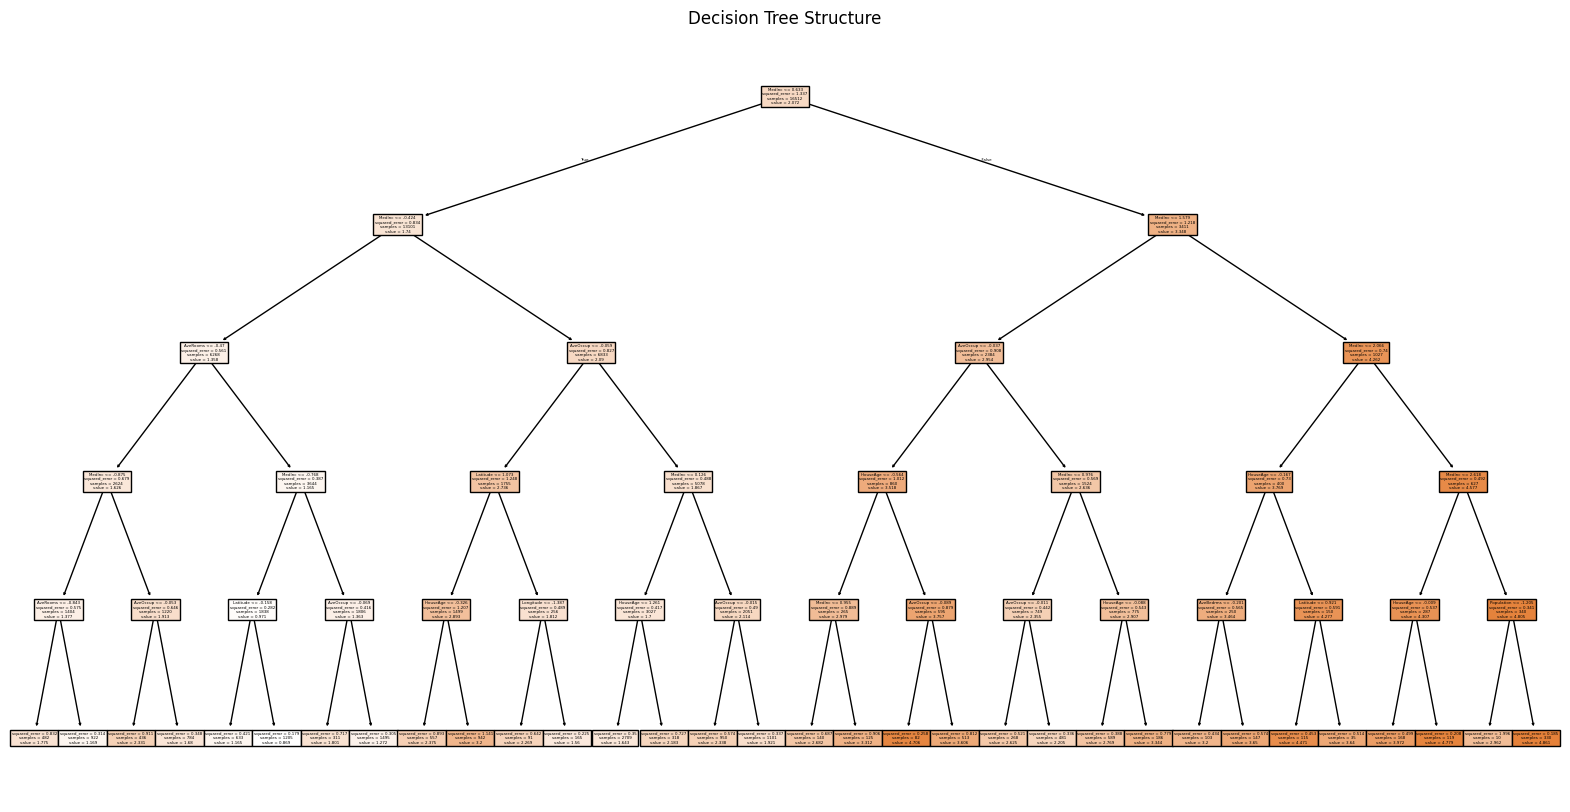

In [ ]:
# Decision Tree visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(models['Decision Tree'], feature_names=housing.feature_names, filled=True)
plt.title('Decision Tree Structure')
plt.show()

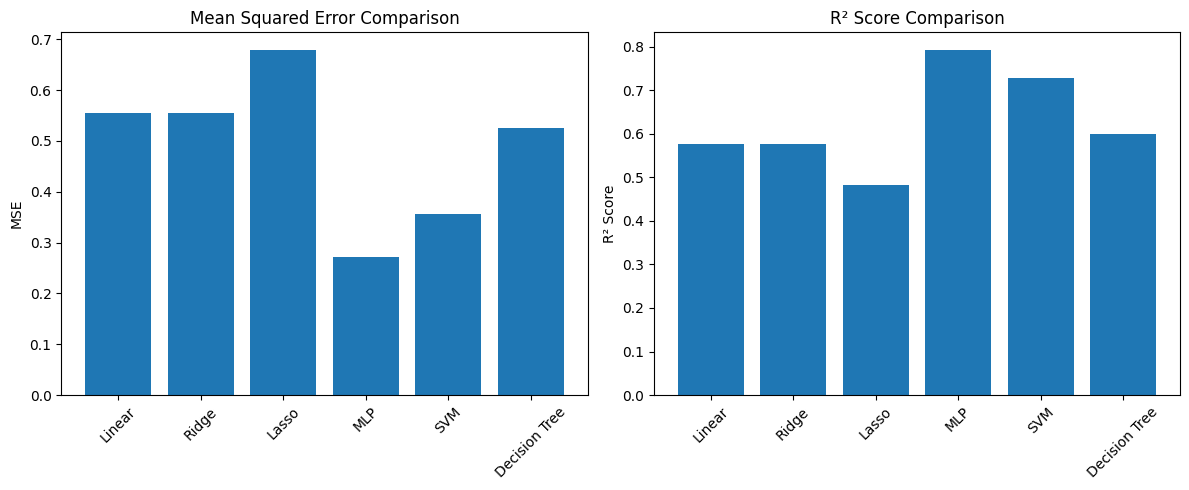

In [ ]:
# Plot MSE and R² comparison
plt.figure(figsize=(12, 5))

# MSE plot
plt.subplot(1, 2, 1)
mse_values = [results[model]['MSE'] for model in results.keys()]
plt.bar(results.keys(), mse_values)
plt.title('Mean Squared Error Comparison')
plt.xticks(rotation=45)
plt.ylabel('MSE')

# R² plot
plt.subplot(1, 2, 2)
r2_values = [results[model]['R2'] for model in results.keys()]
plt.bar(results.keys(), r2_values)
plt.title('R² Score Comparison')
plt.xticks(rotation=45)
plt.ylabel('R² Score')

plt.tight_layout()
plt.show()

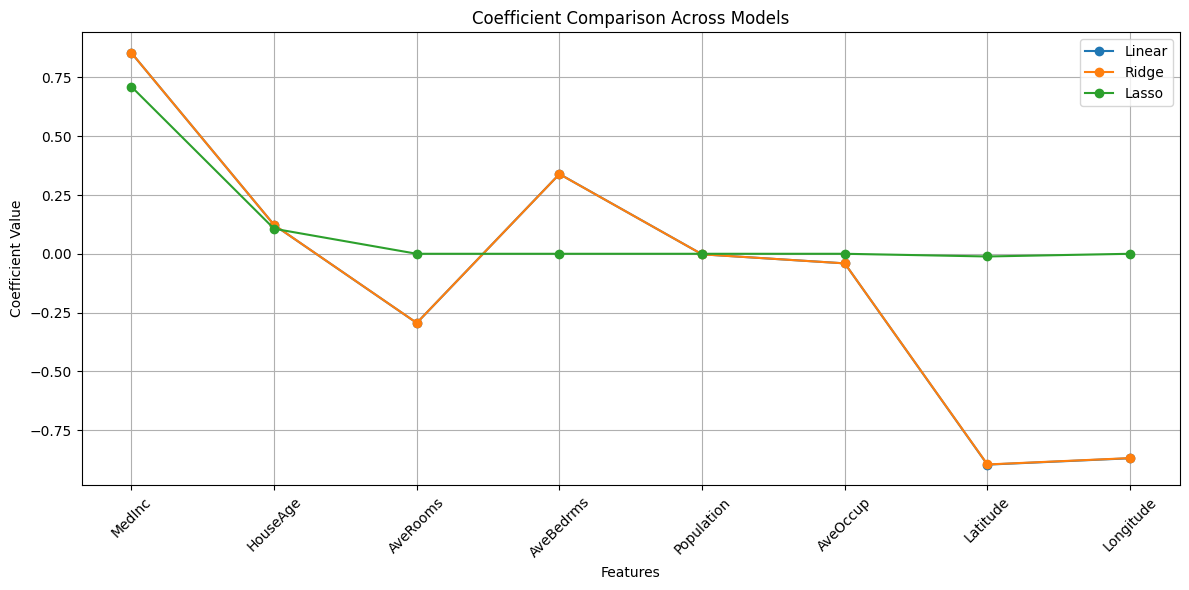

In [ ]:
# Plot coefficient comparison (only for models with coefficients)
plt.figure(figsize=(12, 6))
features = housing.feature_names

for name in ['Linear', 'Ridge', 'Lasso']:  # Only plot models with coefficients
    if results[name]['Coefficients'] is not None:
        plt.plot(features, results[name]['Coefficients'],
                marker='o', label=name)

plt.title('Coefficient Comparison Across Models')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

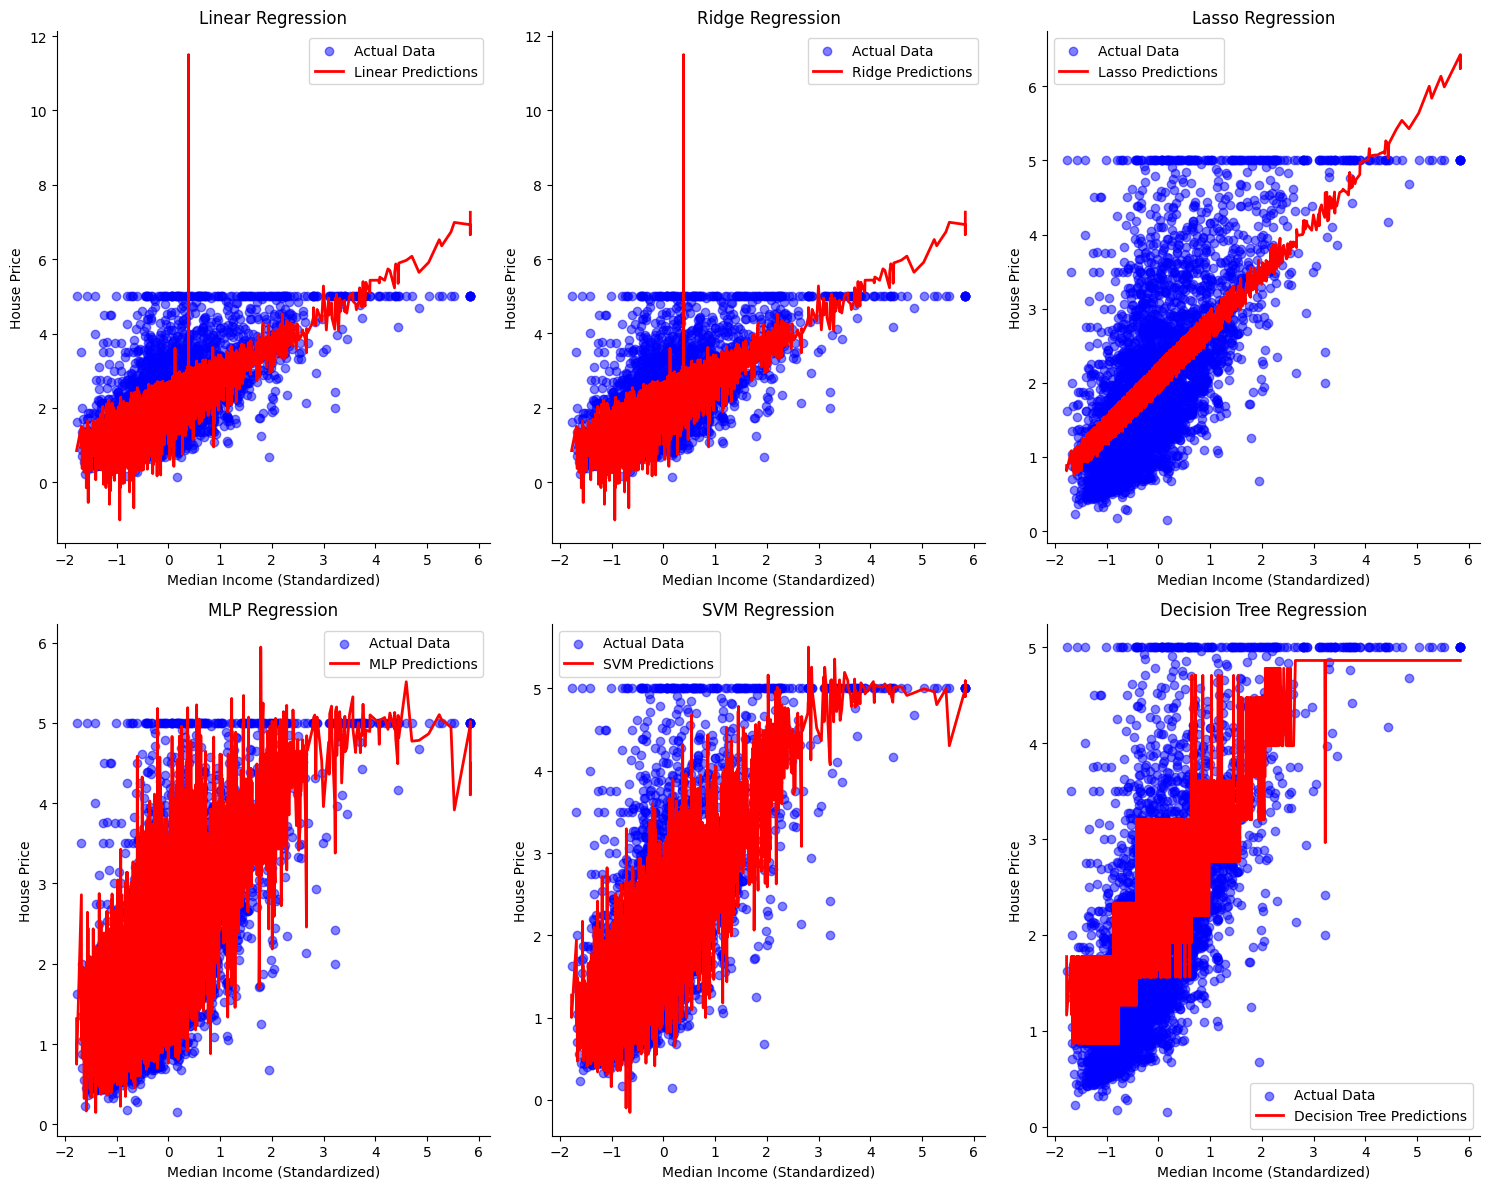

In [ ]:
# Plot individual regression lines for each model
plt.figure(figsize=(15, 12))
for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 3, i)
    plt.scatter(X_test_scaled[:, 0], y_test, color='blue', alpha=0.5, label='Actual Data')
    y_pred = model.predict(X_test_scaled)

    # Sort points for better visualization of non-linear models
    sort_idx = np.argsort(X_test_scaled[:, 0])
    plt.plot(X_test_scaled[:, 0][sort_idx], y_pred[sort_idx],
             color='red', linewidth=2, label=f'{name} Predictions')

    plt.gca().spines[['top', 'right',]].set_visible(False)
    plt.xlabel('Median Income (Standardized)')
    plt.ylabel('House Price')
    plt.title(f'{name} Regression')
    plt.legend()

plt.tight_layout()
plt.show()